# **Intermediate Data Analysis for Image Data**
# Dataloper


*   Abiyyu Fathin Derian
*   Alifia C Harmadi
*   Dhea Fajriati Anas
*   Hendri Prabowo
*   Nikolas Rakryan Widagdo




# Impor Library and Data

In [ ]:
#import package general library for image processing
%tensorflow_version 1.x
import os
import cv2
import numpy as np
import tensorflow as tf

#set random number
np.random.seed(1)
tf.compat.v1.set_random_seed(1)

#import package for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#import package for evaluation
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

#import package for modelling
from tensorflow import keras
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.models import Sequential, load_model
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing import image

In [ ]:
#import data
cifar=tf.keras.datasets.cifar10
(X_train, y_train), (X_test, y_test) = cifar.load_data()

#set label
labelNames = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [ ]:
#check data dimension
print(X_train.shape)
print(X_test.shape)
print(X_test.dtype)
print(X_test.dtype)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
uint8
uint8


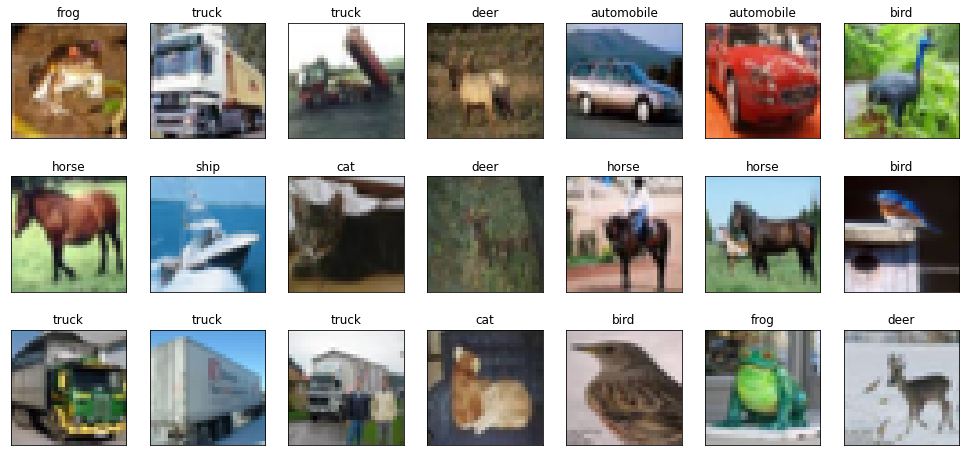

In [ ]:
#show several images
fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title(labelNames[y_train[index][0]])
        axes[i,j].imshow(X_train[index])
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

# Data Preprocessing

In [ ]:
#train images and labels
X_train = X_train[5000:]
y_train = y_train[5000:]

#create validation set
valid_images = X_train[:5000]
valid_labels = y_train[:5000]

In [ ]:
#create function to visualization image
def visualize_data(images, categories, class_names):
    fig, axes = plt.subplots(ncols=7, nrows=3, figsize=(17, 8))
    index = 0
    for i in range(3):
        for j in range(7):
            axes[i,j].set_title(class_names[categories[index][0]])
            axes[i,j].imshow(images[index],cmap='gray')
            axes[i,j].get_xaxis().set_visible(False)
            axes[i,j].get_yaxis().set_visible(False)
            index += 1
    plt.show()

In [ ]:
#convert all those images (both validation and test data) into grayscale to reduce the dimensionality of the data
X_train = np.array([cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) for image in X_train])
valid_images = np.array([cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) for img2 in valid_images])
X_test = np.array([cv2.cvtColor(img3, cv2.COLOR_BGR2GRAY) for img3 in X_test])

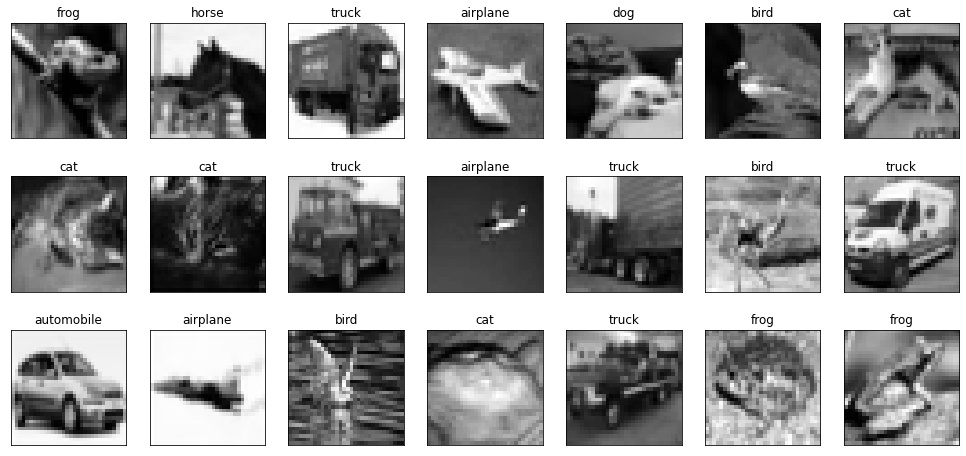

In [ ]:
#show the data
visualize_data(valid_images,valid_labels, labelNames)

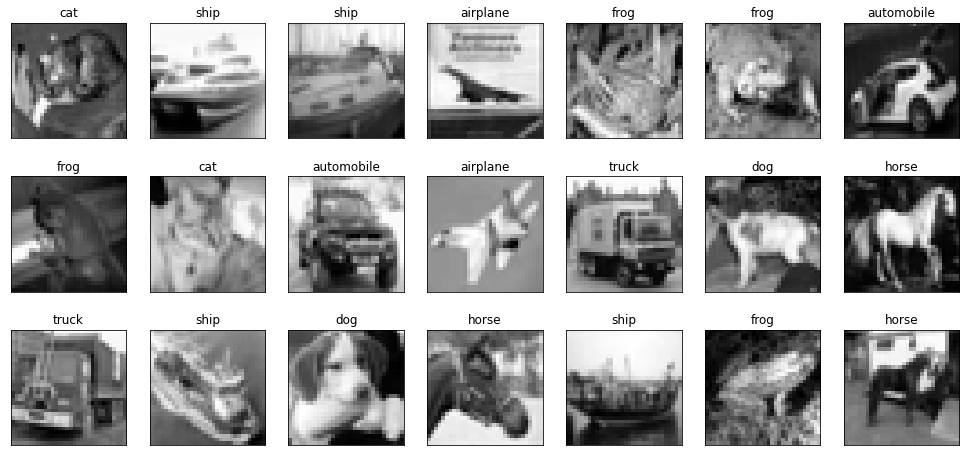

In [ ]:
#show the image in testing
visualize_data(X_test, y_test, labelNames)

In [ ]:
#reshape data dimension
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
valid_images = valid_images.reshape(valid_images.shape[0], valid_images.shape[1], valid_images.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [ ]:
#show the data dimension
print("Train images set : {}".format(np.shape(X_train)))
print("Test images set : {}".format(np.shape(X_test)))
print("The validation images set size: {}".format(np.shape(valid_images)))

Train images set : (45000, 32, 32, 1)
Test images set : (10000, 32, 32, 1)
The validation images set size: (5000, 32, 32, 1)


In [ ]:
#normalize the predictor variable
one_hot_encoder = OneHotEncoder(sparse=False)
one_hot_encoder.fit(y_train)
X_train = X_train / 255 # normalize to 0-1
y_train = one_hot_encoder.transform(y_train)
X_test = X_test / 255 # normalize to 0-1
y_test = one_hot_encoder.transform(y_test)
valid_images = valid_images/255.0
valid_labels = one_hot_encoder.transform(valid_labels)

# Modelling

In [ ]:
#define input shape
input_shape = (X_train.shape[1], X_train.shape[2], 1)
input_shape

(32, 32, 1)

In [ ]:
#create cnn model
model = Sequential()
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same', input_shape=input_shape))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(16, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', strides=(1, 1), padding='same'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [ ]:
#summary of cnn model architecture
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 16)        160       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 16)        9232      
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 16, 16, 32)        4640      
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)       

In [ ]:
# compile model categorical cross entropy loss function for multiclass classification
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
#set validation data
validation = valid_images, valid_labels

#set the testing data
test = X_test,y_test

In [ ]:
#train the model
history = model.fit(X_train, y_train, epochs=30, batch_size=32, validation_data=validation, callbacks=chck_ponints, verbose=2)


Train on 45000 samples, validate on 5000 samples
Epoch 1/30
 - 304s - loss: 1.7587 - acc: 0.3454 - val_loss: 1.3905 - val_acc: 0.4910
Epoch 2/30
 - 299s - loss: 1.3513 - acc: 0.5192 - val_loss: 1.1565 - val_acc: 0.5914
Epoch 3/30
 - 298s - loss: 1.1484 - acc: 0.5958 - val_loss: 0.9453 - val_acc: 0.6730
Epoch 4/30
 - 296s - loss: 1.0142 - acc: 0.6490 - val_loss: 0.8457 - val_acc: 0.7086
Epoch 5/30
 - 296s - loss: 0.9116 - acc: 0.6846 - val_loss: 0.7390 - val_acc: 0.7464
Epoch 6/30
 - 299s - loss: 0.8443 - acc: 0.7108 - val_loss: 0.6929 - val_acc: 0.7638
Epoch 7/30
 - 298s - loss: 0.7806 - acc: 0.7302 - val_loss: 0.5830 - val_acc: 0.8076
Epoch 8/30
 - 298s - loss: 0.7303 - acc: 0.7474 - val_loss: 0.5412 - val_acc: 0.8218
Epoch 9/30
 - 297s - loss: 0.6812 - acc: 0.7647 - val_loss: 0.4902 - val_acc: 0.8338
Epoch 10/30
 - 297s - loss: 0.6434 - acc: 0.7795 - val_loss: 0.4250 - val_acc: 0.8692
Epoch 11/30
 - 305s - loss: 0.6036 - acc: 0.7918 - val_loss: 0.4241 - val_acc: 0.8674
Epoch 12/30
 

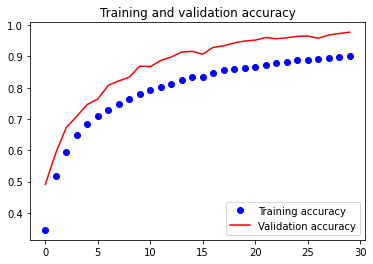

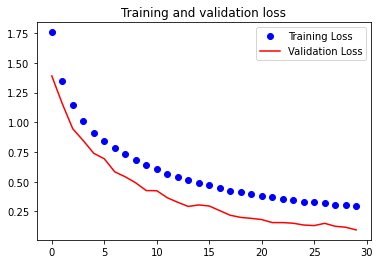

In [ ]:
#training and validation accuracy
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy',color="red")
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss', color="red")
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
#save our model
model.save("our_cnn_model.h5")

# Evaluation

In [ ]:
# evaluate model
loss, acc = model.evaluate(X_test, y_test, verbose=0)
x_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)
predict_test=model.predict(x_test)
print('Test Loss: %.3f' % loss)
print('Test Accuracy: %.3f' % acc)

Test Loss: 1.038
Test Accuracy: 0.726


In [ ]:
# transform data
predict_test = one_hot_encoder.inverse_transform(predict_test)
y_test = one_hot_encoder.inverse_transform(y_test)

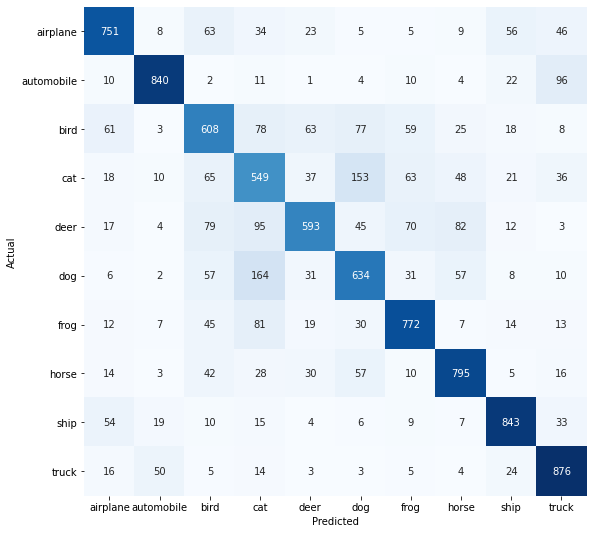

In [ ]:
#confusion matrix
cm = confusion_matrix(y_test, predict_test)
plt.figure(figsize=(9,9))
sns.heatmap(cm, cbar=False, xticklabels=labelNames, yticklabels=labelNames, fmt='d', annot=True, cmap=plt.cm.Blues)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
#classification report
report=classification_report(y_test, predict_test,target_names=labelNames)
print(report)

              precision    recall  f1-score   support

    airplane       0.78      0.75      0.77      1000
  automobile       0.89      0.84      0.86      1000
        bird       0.62      0.61      0.62      1000
         cat       0.51      0.55      0.53      1000
        deer       0.74      0.59      0.66      1000
         dog       0.63      0.63      0.63      1000
        frog       0.75      0.77      0.76      1000
       horse       0.77      0.80      0.78      1000
        ship       0.82      0.84      0.83      1000
       truck       0.77      0.88      0.82      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



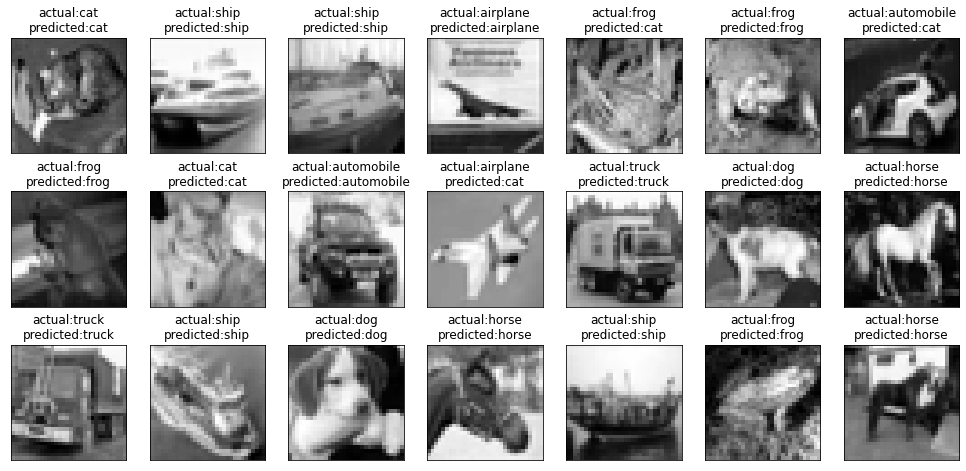

In [ ]:
# display the pictures of test set used train model
x_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])
y_test = y_test.astype(int)
predict_test = predict_test.astype(int)
fig, axes = plt.subplots(ncols=7, nrows=3, sharex=False,
    sharey=True, figsize=(17, 8))
index = 0
for i in range(3):
    for j in range(7):
        axes[i,j].set_title('actual:' + labelNames[y_test[index][0]] + '\n' 
                            + 'predicted:' + labelNames[predict_test[index][0]])
        axes[i,j].imshow(x_test[index], cmap='gray')
        axes[i,j].get_xaxis().set_visible(False)
        axes[i,j].get_yaxis().set_visible(False)
        index += 1
plt.show()

# Predict New Image

Predicted :  airplane
Predicted :  0.92031443


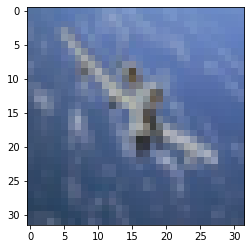

In [ ]:
#load the image
img_path = '/content/airplane2.png'
img = image.load_img(img_path, target_size=(32, 32))

#pre-processing new image
ax1 = plt.imshow(img)
x = image.img_to_array(img)
x = np.array([cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)])
x = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1)
x = x / 255 # normalize to 0-1

#make a prediction for the new image
prediction = model.predict(x)

#print the result
print('Predicted : ', labelNames[model.predict_classes(x)[0]])
print('Predicted : ', prediction[0][model.predict_classes(x)[0]])

Predicted :  dog
Predicted :  0.99939775


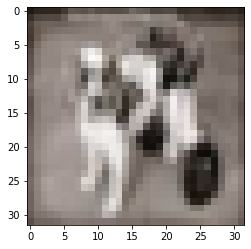

In [ ]:
#load the image
img_path = '/content/dog1.png'
img = image.load_img(img_path, target_size=(32, 32))

#pre-processing new image
ax1 = plt.imshow(img)
x = image.img_to_array(img)
x = np.array([cv2.cvtColor(x, cv2.COLOR_RGB2GRAY)])
x = x.reshape(x.shape[0], x.shape[1], x.shape[2], 1)
x = x / 255 # normalize to 0-1

#make a prediction for the new image
prediction = model.predict(x)

#print the result
print('Predicted : ', labelNames[model.predict_classes(x)[0]])
print('Predicted : ', prediction[0][model.predict_classes(x)[0]])